<a href="https://colab.research.google.com/github/ANIRUDH9325/MACHINE-LEARNING-MODULE-3-ASSIGNMENT/blob/LINEAR-2/linear_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R-squared in a regression model:
R-squared (coefficient of determination) represents the proportion of the variance in the dependent variable that is explained by the independent variables. It measures the goodness of fit of the model.

Assumptions of linear regression:

Linearity: The relationship between predictors and the target variable is linear.
Independence: Observations are independent of each other.
Homoscedasticity: Constant variance of residuals.
Normality: Residuals should be normally distributed.
No multicollinearity: Predictors should not be highly correlated.

Difference between R-squared and Adjusted R-squared:
Adjusted R-squared adjusts for the number of predictors in the model, penalizing the inclusion of unnecessary variables. Unlike R-squared, it only increases if new predictors improve the model.

Why use Mean Squared Error (MSE):
MSE measures the average squared difference between actual and predicted values. Squaring the errors gives more weight to larger errors, making it sensitive to outliers.

nterpreting Adjusted R-squared = 0.85:
This means that 85% of the variance in the dependent variable is explained by the independent variables, after adjusting for the number of predictors.

Checking normality of residuals in linear regression:

Histogram or Q-Q plot of residuals.
Shapiro-Wilk or Kolmogorov-Smirnov test.
Anderson-Darling test.
Skewness and kurtosis values.


What is multicollinearity, and its impact on regression:
Multicollinearity occurs when independent variables are highly correlated. It can lead to unstable coefficient estimates and reduce the interpretability of the model.

What is Mean Absolute Error (MAE):
MAE is the average of the absolute differences between actual and predicted values. Unlike MSE, it treats all errors equally without squaring them.



Benefits of using an ML pipeline:

Standardizes workflow for consistency.
Automates preprocessing, feature selection, and modeling.
Reduces errors and improves scalability.
Ensures reproducibility

Why RMSE is more interpretable than MSE:
RMSE is in the same units as the target variable, making it easier to interpret compared to MSE, which is in squared units.

What is pickling in Python, and its use in ML:
Pickling serializes Python objects (e.g., ML models) for storage or transfer, allowing models to be reused without retraining.

In [ ]:
What does a high R-squared value mean:
A high R-squared suggests that the model explains a large portion of the variance in the dependent variable. However, it does not confirm causation or model correctness.



What does a high R-squared value mean:
A high R-squared suggests that the model explains a large portion of the variance in the dependent variable. However, it does not confirm causation or model correctness.



What happens if linear regression assumptions are violated:

Non-linearity: Poor model fit.
Autocorrelation: Biased coefficients.
Heteroscedasticity: Inefficient estimates.
Multicollinearity: Unstable coefficients.
Non-normal residuals: Affects inference.


Addressing multicollinearity in regression:

Remove highly correlated predictors.
Use Principal Component Analysis (PCA).
Use Ridge or Lasso regression.
Check Variance Inflation Factor (VIF) and drop high-VIF variables.


How feature selection improves regression performance:

Reduces overfitting.
Improves interpretability.
Reduces computational cost.
Enhances model generalization

How Adjusted R-squared is calculated:

Adjusted
𝑅
2
=
1
−
(
(
1
−
𝑅
2
)
(
𝑛
−
1
)
𝑛
−
𝑝
−
1
)
Adjusted R
2
 =1−(
n−p−1
(1−R
2
 )(n−1)
​
 )

Why MSE is sensitive to outliers:
Squaring errors amplifies large errors, making MSE disproportionately affected by outliers.

Role of homoscedasticity in linear regression:
Homoscedasticity ensures that residual variance is constant, leading to reliable coefficient estimates and valid hypothesis testing.



What is Root Mean Squared Error (RMSE):
RMSE is the square root of MSE, measuring average prediction error in the original unit of the dependent variable

Why is pickling considered risky:

Pickled files can be tampered with, leading to security risks.
Compatibility issues may arise across Python versions.
Not human-readable.

Alternatives to pickling for saving ML models:

Joblib (efficient for large NumPy arrays).
ONNX (interoperability between ML frameworks).
TensorFlow SavedModel or PyTorch’s .pt files.

What is heteroscedasticity, and why is it a problem:
Heteroscedasticity occurs when residual variance changes across observations. It leads to inefficient and biased coefficient estimates.

How interaction terms enhance regression models:
Interaction terms capture the combined effect of two variables that might not be evident when considered separately, improving predictive power.

In [1]:
#PRATICAL QUESTIONS

1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset

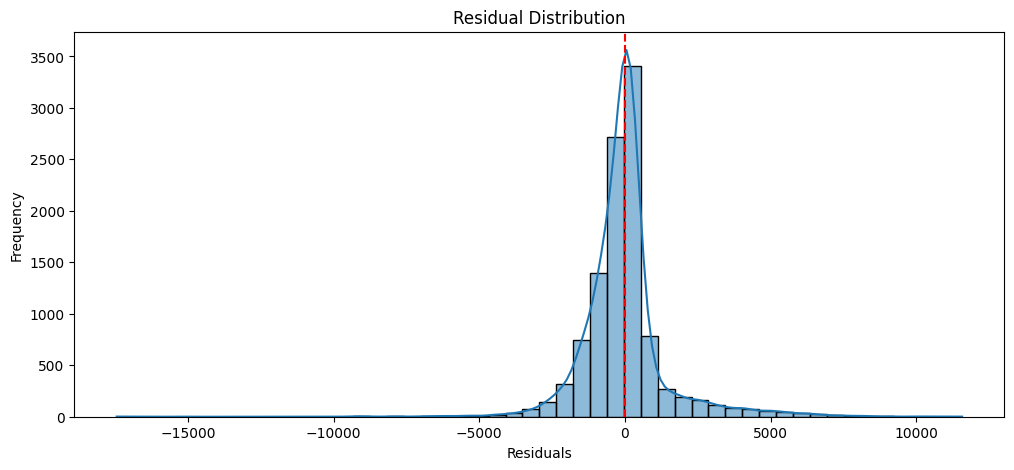

<Figure size 600x600 with 0 Axes>

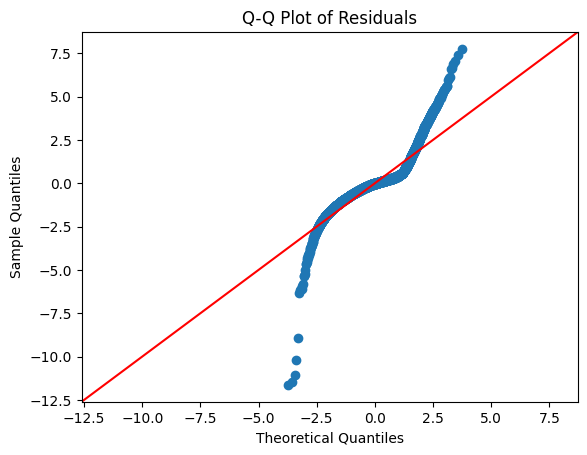

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load Seaborn's diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Selecting features and target variable
X = diamonds.drop(columns=["price"])
y = diamonds["price"]

# Identifying categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing: One-hot encoding for categorical variables and scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# Define regression pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(12, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot to check normality of residuals
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()


 Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load Seaborn's diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Selecting features and target variable
X = diamonds.drop(columns=["price"])
y = diamonds["price"]

# Identifying categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing: One-hot encoding for categorical variables and scaling for numerical variables
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load Seaborn's diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Selecting features and target variable
X = diamonds.drop(columns=["price"])
y = diamonds["price"]

# Identifying categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing: One-hot encoding for categorical variables and scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[

        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

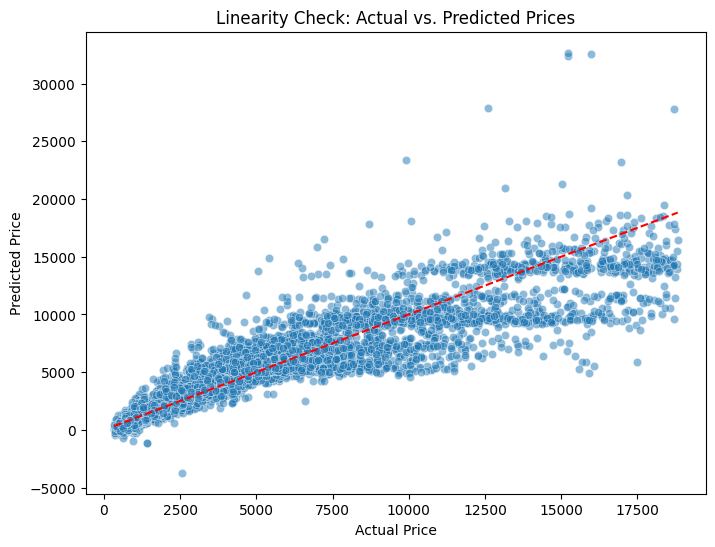

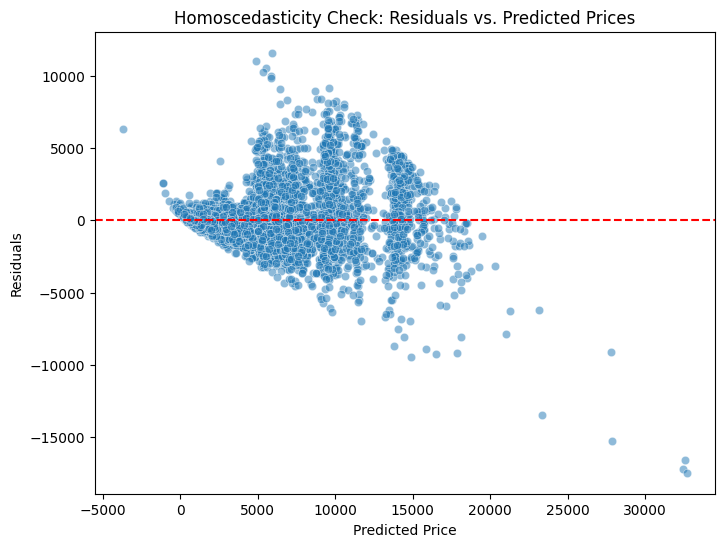

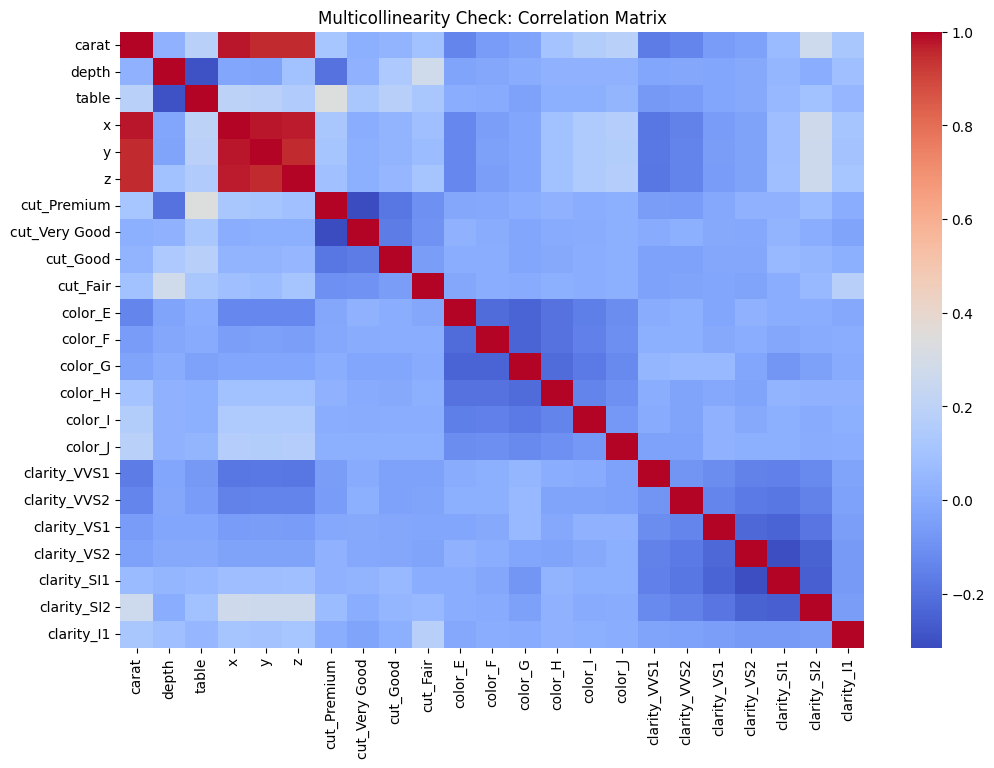


Variance Inflation Factor (VIF) for each feature:
  Feature          VIF
3       x  1284.949828
5       z   540.677349
4       y   530.998218
1   depth   515.146274
2   table   500.595341
0   carat    70.132799


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load Seaborn's diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Selecting features and target variable
X = diamonds.drop(columns=["price"])
y = diamonds["price"]

# Identifying categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing: One-hot encoding for categorical variables and scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# Define regression pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

### LINEARITY CHECK: Scatter Plot of Actual vs. Predicted Values ###
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linearity Check: Actual vs. Predicted Prices")
plt.show()

### HOMOSCEDASTICITY CHECK: Residuals Plot ###
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs. Predicted Prices")
plt.show()

### MULTICOLLINEARITY CHECK: Correlation Matrix ###
# Convert categorical variables to numerical using one-hot encoding for correlation matrix
X_encoded = pd.get_dummies(X, drop_first=True)
correlation_matrix = X_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Multicollinearity Check: Correlation Matrix")
plt.show()

### MULTICOLLINEARITY CHECK: Variance Inflation Factor (VIF) ###
# Compute VIF for numerical features only
X_numerical = X_encoded.select_dtypes(include=["int64", "float64"])
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(len(X_numerical.columns))]

print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data.sort_values(by="VIF", ascending=False))


4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models


Performance of Regression Models:

                            MSE         MAE       R^2
Linear Regression  2.242179e+06  888.480863  0.858954
Ridge Regression   2.242190e+06  888.640577  0.858954
Lasso Regression   2.242183e+06  888.499744  0.858954
Decision Tree      1.927696e+06  781.487661  0.878737
Random Forest      1.783300e+06  760.756357  0.887820


<ipython-input-7-e2db52fa1c5a>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MSE"], ax=ax[0], palette="Blues")
<ipython-input-7-e2db52fa1c5a>:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, ha="right")
<ipython-input-7-e2db52fa1c5a>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MAE"], ax=ax[1], palette="Oranges")
<ipython-input-7-e2db52fa1c5a>:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

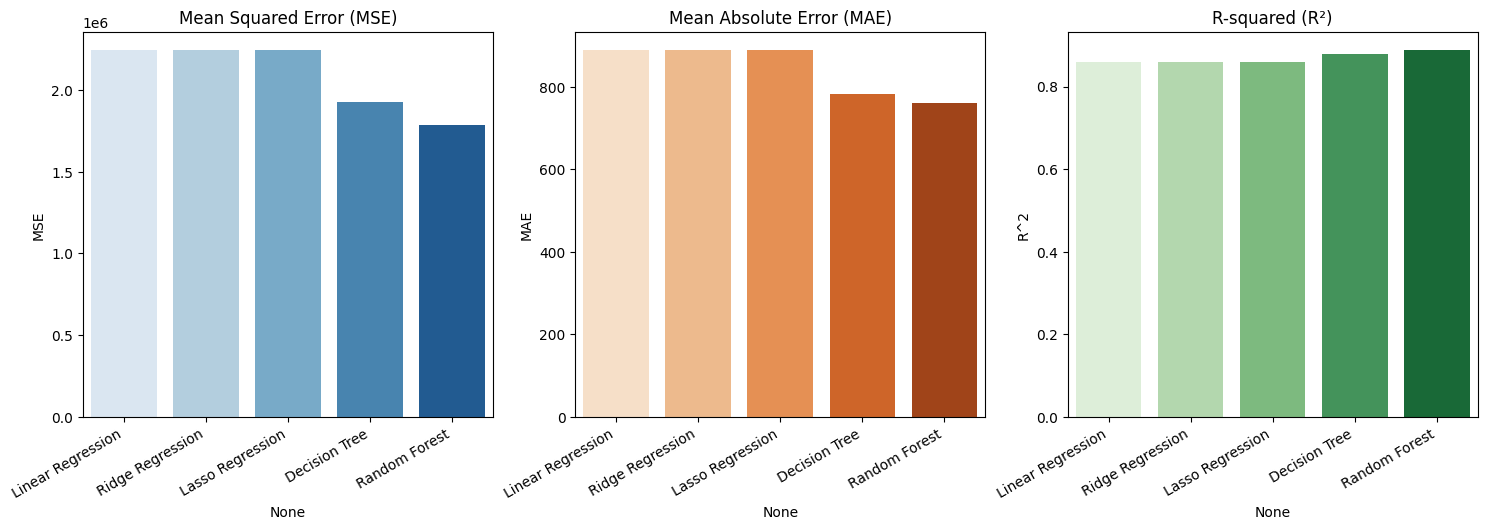

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Seaborn's diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Selecting features and target variable
X = diamonds.drop(columns=["price"])
y = diamonds["price"]

# Identifying categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing: One-hot encoding for categorical variables and scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# Define different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model results
results = {}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipeline.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {"MSE": mse, "MAE": mae, "R^2": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Print results
print("\nPerformance of Regression Models:\n")
print(results_df)

# Plot performance metrics
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# MSE Plot
sns.barplot(x=results_df.index, y=results_df["MSE"], ax=ax[0], palette="Blues")
ax[0].set_title("Mean Squared Error (MSE)")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, ha="right")

# MAE Plot
sns.barplot(x=results_df.index, y=results_df["MAE"], ax=ax[1], palette="Oranges")
ax[1].set_title("Mean Absolute Error (MAE)")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")

# R-squared Plot
sns.barplot(x=results_df.index, y=results_df["R^2"], ax=ax[2], palette="Greens")
ax[2].set_title("R-squared (R²)")
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30, ha="right")

plt.show()


5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.


Model Coefficient (Slope): 7768.91
Model Intercept: -2261.91
R-squared Score: 0.8489


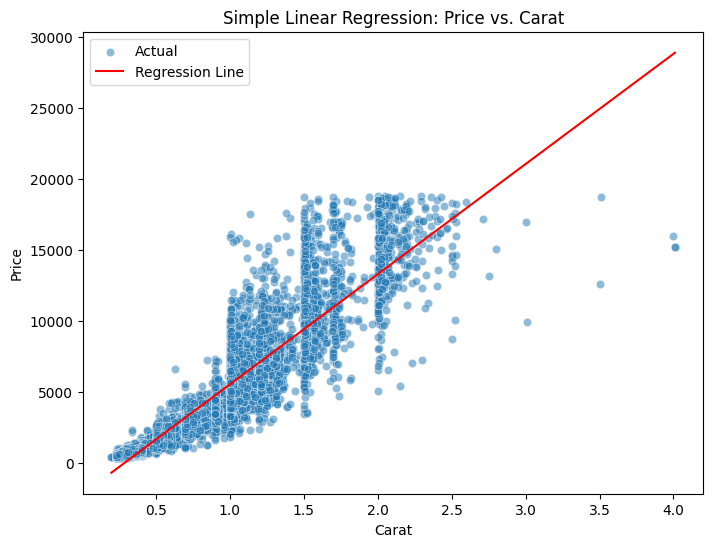

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load Seaborn's diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Selecting the independent (X) and dependent (y) variables
X = diamonds[["carat"]]  # Single feature for simple linear regression
y = diamonds["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y_test, y_pred)

# Print model results
print(f"Model Coefficient (Slope): {slope:.2f}")
print(f"Model Intercept: {intercept:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Visualization: Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test["carat"], y=y_test, alpha=0.5, label="Actual")
sns.lineplot(x=X_test["carat"], y=y_pred, color="red", label="Regression Line")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Price vs. Carat")
plt.legend()
plt.show()


6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the 'tips' dataset from Seaborn
tips = sns.load_dataset("tips")

# Select independent (X) and dependent (y) variables
X = tips[["total_bill"]]  # Predictor variable
y = tips["tip"]  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y_test, y_pred)

#



7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line


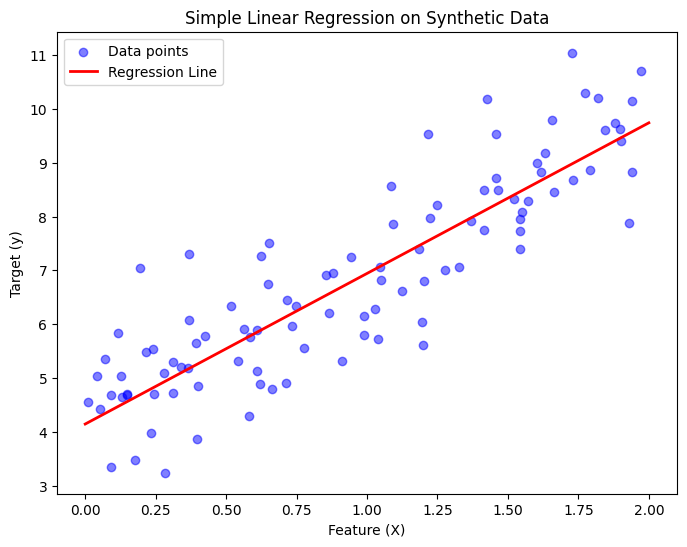

Model Coefficient (Slope): 2.80
Model Intercept: 4.14


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise

# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
X_new = np.array([[0], [2]])  # New X values for prediction
y_pred = model.predict(X_new)

# Step 5: Plot data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")  # Scatter plot of actual data
plt.plot(X_new, y_pred, color="red", linewidth=2, label="Regression Line")  # Regression line
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Simple Linear Regression on Synthetic Data")
plt.legend()
plt.show()

# Print model parameters
print(f"Model Coefficient (Slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")


8. Write a Python script that pickles a trained linear regression model and saves it to a file

In [11]:
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 random values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise

# Step 2: Train a simple linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Pickle the trained model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model has been saved as 'model.pkl'.")

# Step 4: Load the pickled model
with open("model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Step 5: Make a prediction with the loaded model
X_new = np.array([[1.5]])  # Example input
y_pred = loaded_model.predict(X_new)

print(f"Prediction for X = 1.5: {y_pred[0][0]:.2f}")


Model has been saved as 'model.pkl'.
Prediction for X = 1.5: 8.34


9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

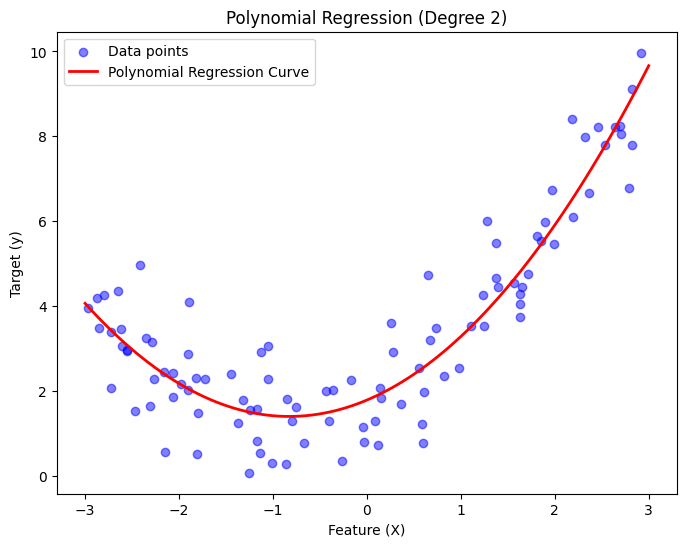

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Random values between -3 and 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)  # Quadratic equation with noise

# Step 2: Create a polynomial regression model (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Step 3: Train the model
poly_model.fit(X, y)

# Step 4: Generate predictions for plotting
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)  # Generate 100 points from -3 to 3
y_plot = poly_model.predict(X_plot)  # Predictions

# Step 5: Plot the original data and regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X_plot, y_plot, color="red", linewidth=2, label="Polynomial Regression Curve")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()



10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility
X = 10 * np.random.rand(100, 1)  # 100 random values between 0 and 10
y = 5 + 2 * X + np.random.randn(100, 1)  # y = 5 + 2X + noise

# Step 2: Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Print the model’s parameters
print(f"Model Coefficient (Slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")


Model Coefficient (Slope): 1.96
Model Intercept: 5.14


11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

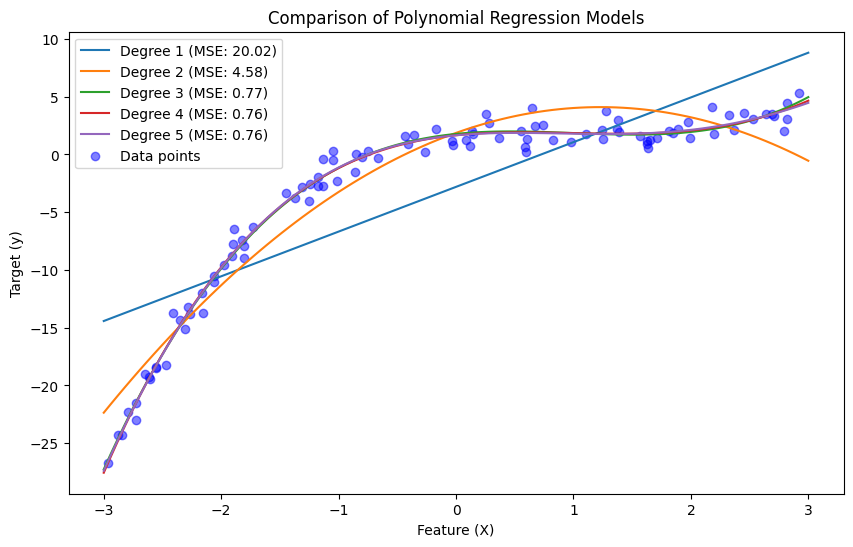

Mean Squared Error for different polynomial degrees:
Degree 1: MSE = 20.02
Degree 2: MSE = 4.58
Degree 3: MSE = 0.77
Degree 4: MSE = 0.76
Degree 5: MSE = 0.76


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Random values between -3 and 3
y = 0.5 * X**3 - 1.5 * X**2 + X + 2 + np.random.randn(100, 1)  # Cubic equation with noise

# Step 2: Fit polynomial regression models of different degrees
degrees = [1, 2, 3, 4, 5]  # Degrees to test
mse_scores = {}  # Store MSE for each degree

plt.figure(figsize=(10, 6))

X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)  # Generate 100 evenly spaced values for smooth plotting

for degree in degrees:
    # Create and train polynomial regression model
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X, y)

    # Predict on training data
    y_pred = poly_model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mse_scores[degree] = mse

    # Plot regression curve
    y_plot = poly_model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f"Degree {degree} (MSE: {mse:.2f})")

# Step 3: Plot original data and regression curves
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Comparison of Polynomial Regression Models")
plt.legend()
plt.show()

# Step 4: Print MSE scores
print("Mean Squared Error for different polynomial degrees:")
for degree, mse in mse_scores.items():
    print(f"Degree {degree}: MSE = {mse:.2f}")


12. Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with two features
np.random.seed(42)
X1 = 10 * np.random.rand(100, 1)  # Feature 1
X2 = 5 * np.random.rand(100, 1)   # Feature 2
y = 3 + 2 * X1 + 1.5 * X2 + np.random.randn(100, 1)  # Linear relationship with noise

# Combine features into a single array
X = np.hstack((X1, X2))

# Step 2: Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and calculate R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Print model parameters
print(f"Model Coefficients (Slopes): {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")
print(f"R-squared Score: {r2:.4f}")


Model Coefficients (Slopes): [1.97500221 1.65743475]
Model Intercept: 2.79
R-squared Score: 0.9853


13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

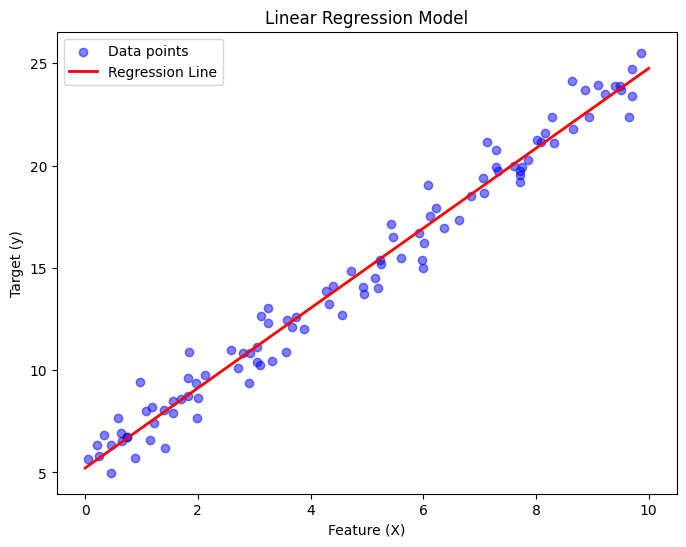

Model Coefficient (Slope): 1.95
Model Intercept: 5.22


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(100, 1)  # Random values between 0 and 10
y = 5 + 2 * X + np.random.randn(100, 1)  # Linear relationship with noise

# Step 2: Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Generate predictions
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)  # 100 evenly spaced values for smooth plotting
y_pred = model.predict(X_plot)

# Step 4: Plot the regression line and data points
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X_plot, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Model")
plt.legend()
plt.show()

# Step 5: Print model parameters
print(f"Model Coefficient (Slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")


14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Generate synthetic data with correlated features
np.random.seed(42)
X1 = 10 * np.random.rand(100, 1)  # Feature 1
X2 = 2 * X1 + np.random.rand(100, 1)  # Feature 2 (Highly correlated with X1)
X3 = 5 * np.random.rand(100, 1)  # Feature 3 (Less correlation)

# Combine into a DataFrame
df = pd.DataFrame(np.hstack((X1, X2, X3)), columns=["X1", "X2", "X3"])

# Step 2: Standardize the features (optional but improves stability)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Step 3: Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

# Step 4: Print VIF results
print("Variance Inflation Factor (VIF) values:")
print(vif_data)


Variance Inflation Factor (VIF) values:
  Feature         VIF
0      X1  421.089923
1      X2  421.341746
2      X3    1.023792


15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

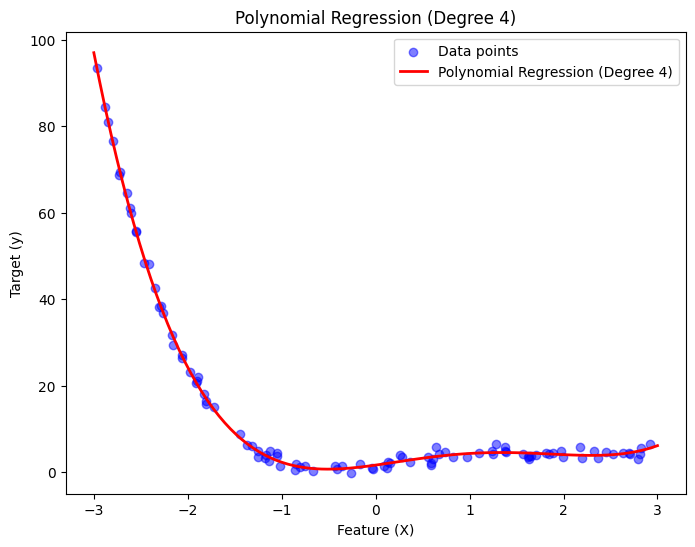

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data with a degree-4 polynomial relationship
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Random values between -3 and 3
y = 2 + 0.5 * X**4 - 2 * X**3 + X**2 + 3 * X + np.random.randn(100, 1)  # Degree 4 equation with noise

# Step 2: Transform features using PolynomialFeatures (degree 4)
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)  # Transform X into polynomial features

# Step 3: Train a Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Generate predictions for a smooth regression curve
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)  # 100 evenly spaced values
X_plot_poly = poly_features.transform(X_plot)  # Transform for polynomial features
y_pred = model.predict(X_plot_poly)

# Step 5: Plot the regression curve and data points
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X_plot, y_pred, color="red", linewidth=2, label="Polynomial Regression (Degree 4)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 4)")
plt.legend()
plt.show()


16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [19]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data
np.random.seed(42)
X1 = 10 * np.random.rand(100, 1)  # Feature 1
X2 = 5 * np.random.rand(100, 1)   # Feature 2
y = 3 + 2 * X1 + 1.5 * X2 + np.random.randn(100, 1)  # Linear relationship with noise

# Combine features into a single array
X = np.hstack((X1, X2))

# Step 2: Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline with standardization and linear regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize the data
    ("regressor", LinearRegression())  # Train Linear Regression model
])

# Step 4: Train the pipeline
pipeline.fit(X_train, y_train)

# Step 5: Make predictions and compute R-squared score
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 6: Print results
print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.9853


17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.

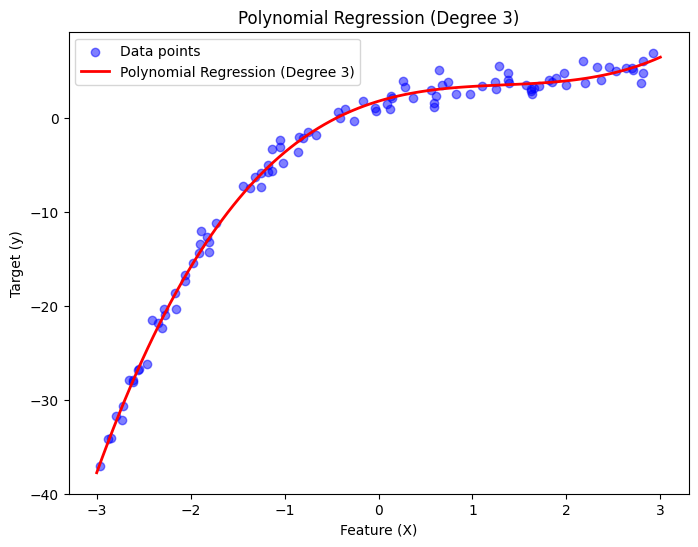

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data with a cubic polynomial relationship
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Random values between -3 and 3
y = 2 + 3 * X - 2 * X**2 + 0.5 * X**3 + np.random.randn(100, 1)  # Cubic equation with noise

# Step 2: Transform features using PolynomialFeatures (degree 3)
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)  # Transform X into polynomial features

# Step 3: Train a Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Generate predictions for a smooth regression curve
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)  # 100 evenly spaced values
X_plot_poly = poly_features.transform(X_plot)  # Transform for polynomial features
y_pred = model.predict(X_plot_poly)

# Step 5: Plot the regression curve and data points
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X_plot, y_pred, color="red", linewidth=2, label="Polynomial Regression (Degree 3)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 3)")
plt.legend()
plt.show()


18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data
np.random.seed(42)
n_samples = 100

# Generate 5 random features
X = np.random.rand(n_samples, 5)

# Define a linear relationship with some noise
true_coefficients = np.array([3.5, -2.0, 4.0, 1.2, -3.3])  # True coefficients
y = X @ true_coefficients + np.random.randn(n_samples) * 0.5  # Adding noise

# Step 2: Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and compute R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Print results
print(f"R-squared Score: {r2:.4f}")
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared Score: 0.8964
Model Coefficients: [ 3.32647934 -2.11696166  4.32395165  1.2727923  -3.52282008]
Intercept: 0.07299237199349418


19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

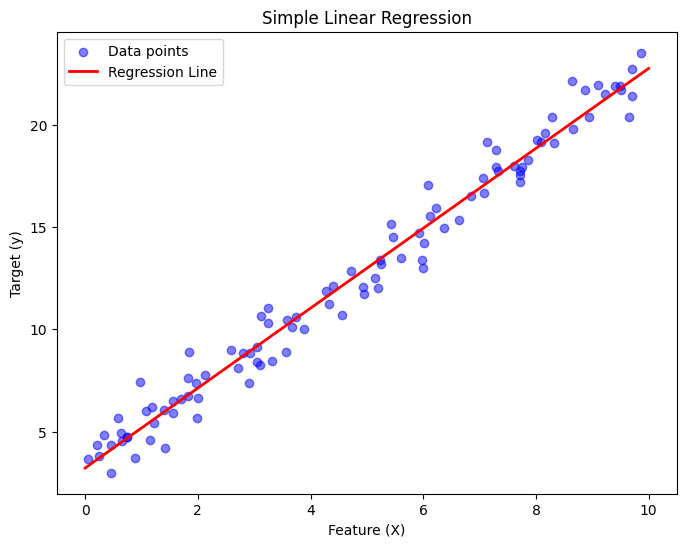

Coefficient: 1.9540
Intercept: 3.2151


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(100, 1)  # Random values between 0 and 10
y = 3 + 2 * X + np.random.randn(100, 1)  # Linear equation with noise

# Step 2: Train a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Generate predictions
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)  # Evenly spaced values for plotting
y_pred = model.predict(X_plot)

# Step 4: Plot the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X_plot, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# Step 5: Print model parameters
print(f"Coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")


20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data
np.random.seed(42)
n_samples = 100

# Generate 3 random features
X = np.random.rand(n_samples, 3)

# Define a linear relationship with some noise
true_coefficients = np.array([4.5, -2.3, 3.8])  # True coefficients
y = X @ true_coefficients + np.random.randn(n_samples) * 0.5  # Adding noise

# Step 2: Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and compute R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Print results
print(f"R-squared Score: {r2:.4f}")
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared Score: 0.8622
Model Coefficients: [ 4.55294884 -2.337697    4.14302962]
Intercept: -0.04250522081646313


21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [24]:
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(100, 1)  # Feature
y = 5 + 3 * X + np.random.randn(100, 1)  # Linear relationship with noise

# Step 2: Train a Linear Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Save (serialize) the trained model using joblib
joblib.dump(model, "linear_regression_model.pkl")
print("Model saved successfully as 'linear_regression_model.pkl'")

# Step 4: Load (deserialize) the model
loaded_model = joblib.load("linear_regression_model.pkl")
print("Model loaded successfully!")

# Step 5: Verify by making predictions
sample_input = np.array([[5]])  # Example feature value
prediction = loaded_model.predict(sample_input)
print(f"Prediction for input {sample_input.flatten()[0]}: {prediction.flatten()[0]:.2f}")


Model saved successfully as 'linear_regression_model.pkl'
Model loaded successfully!
Prediction for input 5: 19.94


22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Step 2: Select features and target variable
features = ["total_bill", "size", "sex", "smoker", "day", "time"]  # Includes categorical features
target = "tip"

# Step 3: One-hot encode categorical variables
tips_encoded = pd.get_dummies(tips[features], drop_first=True)  # Convert categorical to numeric

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tips_encoded, tips[target], test_size=0.2, random_state=42)

# Step 5: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions and compute R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 7: Print results
print(f"R-squared Score: {r2:.4f}")
print("Model Coefficients:")
for feature, coef in zip(tips_encoded.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")


R-squared Score: 0.4373
Model Coefficients:
total_bill: 0.0947
size: 0.2335
sex_Female: -0.0288
smoker_No: 0.1924
day_Fri: 0.1797
day_Sat: -0.0061
day_Sun: 0.1289
time_Dinner: -0.0950
Intercept: 0.4791
